In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import sys
import xgcm
import xarray as xr

In [2]:
def psi_sb(z0,gamma):
    '''
    
    '''
    return LAABW/H/gamma*Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)

In [3]:
def psi_basin(z0,gamma):
    return

In [4]:
#def psi_channel(channelgrid):
     #*np.ones(np.size(channelgrid))

In [5]:
Lchannel=2500 #km
Lbasin=10000 #km
LAABW=100 #km
LNADW=150
Lice=500 #km
dy=50 #km
dz=100 #m
H=5000 #m
Nz=50 
Nchannel=50
Nbasin=200 #200*50=10000 for tracers
Gamma_ice=1.5e-7 #kg m-2 s-1
tau=0.1 #N m-2
rho0=1000 #kg m-3
f=-1e-4 #s-1
ybasin=np.arange(0,10000,50)



T_gamma=2* 86400*14 #2 week relaxation
gamma_iceN=27.9
y_iceN=-2000 #latitude at the Northern edge of ice
gamma_channelN=25.9
y_channelN=0 #latitude at the Northern edge of the channel
psi_mean=tau/rho0/f
zgrid_psi=np.ones([1,Nz])
zgrid_psi[0,19:]=np.linspace(1,0,31)




#psi=tw/f/rho0+Ke*S

#Dealing with model Z grid
Zp1=np.arange(0,-H-dz,-dz)
Zl=Zp1[1:]
Zu=Zp1[:-1]
Z=(Zl+Zu)/2

#gamma_sb= -Lchannel+Z*LAABW/H#southern boundary
#psi_sb= LAABW/H/#southern boundary
#channelgrid=np.zeros(Nchannel,Nz)
#gamma_surf=
#Gamma_surf=Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)
gamma_channelgrid=np.zeros([Nchannel,Nz])
yid_ice=np.arange(0,10,1)
yid_channel_no_ice=np.arange(10,51,1)



In [6]:
gamma_sample=[25.9,26,27,27.6,27.9,28]
gamma_sample_depth=[0,-200.0,-1000.0,-2000.0,-4000.0,-5000.0]
#w_sample=      [0, 1,1.5 ,1.5,0.5 ,0   , -2 , -4, -6, -8 ,-10, -12, -14 ,-16 ,-17, -16, 0]
#w_sample_depth=[0 ,0.5,0.8 , 1 ,1.4, 1.5, 1.8, 2.1, 2.3 ,2.5, 2.75, 3.1 ,3.5, 4, 4.5, 4.7,5]
#w_sample_depth=[i*-1000 for i in w_sample_depth]
w_sample=      [0, -2,-3 ,-3, -1 ,  -0.5   , -1 , -2, -2    ,   -2 ,-2, -2, -4 ,-6 ,-8.5, -8, 0]
w_sample_depth=[0 ,0.5,0.8 , 1 ,1.4, 1.5, 1.8, 2.1, 2.3 ,2.5, 2.75, 3.1 ,3.5, 4, 4.5, 4.7,5]
w_sample_depth=[i*-1000 for i in w_sample_depth]

fgamma = interp1d(gamma_sample_depth[::-1],gamma_sample[::-1], kind='cubic')
fw = interp1d(w_sample_depth[::-1],w_sample[::-1], kind='cubic')
#density as a function of depth
gamma_basin_init=fgamma(Z)
w_init=fw(Zl)

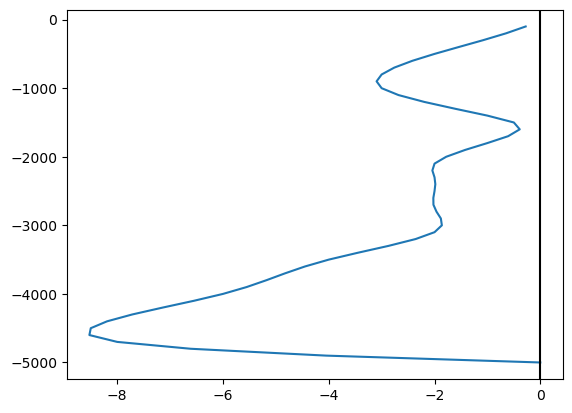

In [7]:
plt.plot(w_init,Zl)
plt.axvline(x=0,color='k')

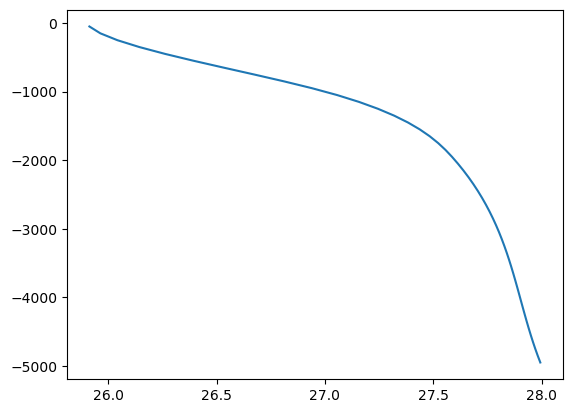

In [8]:

plt.plot(gamma_basin_init,Z)


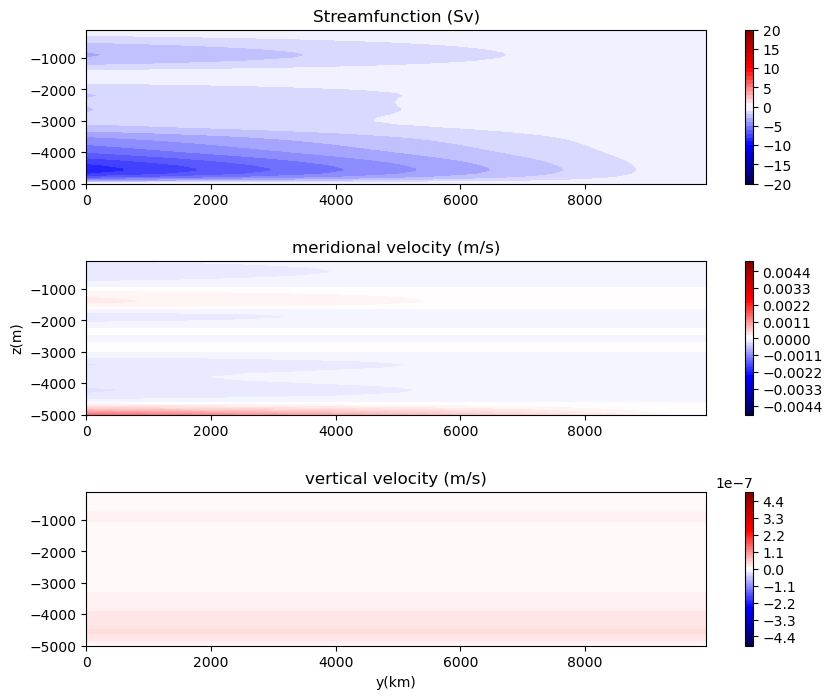

In [9]:
myfigsize=(10,8)
ksurf=1e-5
kdeep=5e-4
Zsill=-2000 #m
Hsill=750 #m
kv=1e-4
kdia=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)
pgamma_pz=(gamma_basin_init[:-1]-gamma_basin_init[1:])/(Z[:-1]-Z[1:]) #on Z inner
pgamma_pz_lower=np.append(pgamma_pz,0)
pgamma_pz_outer=np.insert(pgamma_pz_lower,0,0)
ppgamma_ppz=(pgamma_pz_outer[:-1]-pgamma_pz_outer[1:])/(Zp1[:-1]-Zp1[1:])  #on Z center
basin_width=28000 #km
w_inner=-kdia[:-1]*pgamma_pz/((gamma_basin_init[:-1]+gamma_basin_init[1:])/2)
w=np.append(w_inner,0)
w=w_init*1e6/basin_width/Lbasin/1000/1000
w_basin_grid=-np.tile(w,[Nbasin,1])
 #km
w_transport=w_basin_grid*basin_width*dy*1000*1000

basin_streamfunc=-np.cumsum(w_transport[::-1,:],axis=0)[::-1,:]
basin_streamfunc_zouter=np.c_[np.zeros(Nbasin),basin_streamfunc]
v_basin_grid=-(basin_streamfunc_zouter[:,:-1]-basin_streamfunc_zouter[:,1:])/(Zp1[:-1]-Zp1[1:])/basin_width/1000

fig=plt.figure(figsize=myfigsize)
plt.subplot(3,1,1)
plt.contourf(ybasin,Zl,basin_streamfunc.T/1e6,cmap='seismic',levels=np.arange(-20,20.5,1))

#plt.contourf(ybasin,Zl,w_transport.T)
plt.colorbar()
plt.title('Streamfunction (Sv)')
plt.subplot(3,1,2)


#plt.contourf(ybasin,Zl,w_transport.T)
#plt.colorbar()
plt.contourf(ybasin,Zl,v_basin_grid.T,cmap='seismic',levels=np.arange(-0.005,0.0051,0.0001))
plt.colorbar()
plt.ylabel('z(m)')
plt.title('meridional velocity (m/s)')
plt.subplot(3,1,3)


#plt.contourf(ybasin,Zl,w_transport.T)
#plt.colorbar()
plt.contourf(ybasin,Zl,w_basin_grid.T,cmap='seismic',levels=np.arange(-0.0000005,0.00000051,0.00000001))
plt.colorbar()
plt.xlabel('y(km)')
plt.title('vertical velocity (m/s)')
fig.subplots_adjust(wspace=0.5,hspace=0.5)




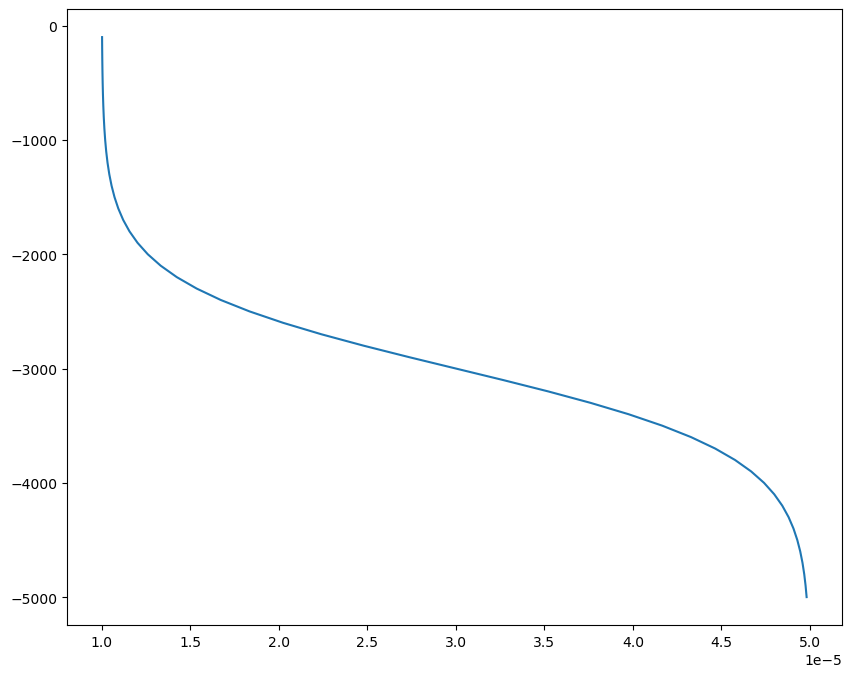

In [10]:
ksurf=1e-5
kdeep=0.5e-4
Zsill=-3000 #m
Hsill=750 #m
kv=1e-4
kdia=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)
fig=plt.figure(figsize=myfigsize)
plt.plot(kdia,Zl)

In [11]:
#dt=86400*10#s
#T=31104000*300#00#31104000*5000 #years->second
dt=86400*20
T=31104000*5000
Nt=T//dt
kiso=500#-500#m2/s
#kv=kv0
#kdia=0
tracer=np.zeros([Nbasin,Nz])
#tracer[0,:]=np.linspace(0,400*31104000,Nz)
tracer_source=np.ones([Nbasin,Nz])
tracer_yface=np.zeros([Nbasin,Nz])
tracer_zface=np.zeros([Nbasin,Nz])
grad_y=np.zeros([Nbasin,Nz])
grad_z=np.zeros([Nbasin,Nz])
advy_1=np.zeros([Nbasin,Nz])
advy_2=np.zeros([Nbasin,Nz])
advz_1=np.zeros([Nbasin,Nz])
advz_2=np.zeros([Nbasin,Nz])
##write a 2D solver here


for it in range(0,Nt):
    #advection
    tracer_yface[1:,:]=(tracer[:-1,:]+tracer[1:,:])/2 #v surface is at the negative(south) side of the t grid
    tracer_zface[:,:-1]=(tracer[:,:-1]+tracer[:,1:])/2 #w surface is at the top of t grid
    
    advy_1[1:,:]=np.where(v_basin_grid[1:,:]<0, tracer[:-1,:]*v_basin_grid[1:,:],0)
    advy_2=np.where(v_basin_grid>0, tracer*v_basin_grid,0)
    advy=v_basin_grid*tracer_yface
    advy=advy_1+advy_2
    advy=advy #on southern grid face
    advz_1=np.where(w_basin_grid>0,tracer*w_basin_grid,0)
    advz_2[:,:-1]=np.where(w_basin_grid[:,:-1]<0,tracer[:,1:]*w_basin_grid[:,:-1],0)
    advz=advz_1+advz_2
    advz=advz #on lower grid face
    #advz=advz*
    #advz=w_basin_grid*tracer_zface
    
    #advy=advy/1000
    #advz=advz*1000000
    #diffusion
    grad_y[1:,:]=(tracer[1:,:]-tracer[:-1,:])/dy/1000
    grad_z[:,:-1]=-(tracer[:,1:]-tracer[:,:-1])/dz #w grid is on the lower Z surface

    diffy=-kiso*grad_y
    diffz=-kdia*grad_z

    fluxy=advy+diffy 
    #fluxy=fluxy
    fluxz=advz+diffz
    
    fluxy=np.vstack((fluxy,np.zeros([1,Nz])))
    #fluxz=np.hstack((np.ones([Nbasin,1]),fluxz))
    tracer[1:,1:]=tracer[1:,1:]+dt*((-fluxy[2:,1:]+fluxy[1:-1,1:])/dy/1000+(-fluxz[1:,:-1]+fluxz[1:,1:])/dz+tracer_source[1:,1:])



In [12]:
def calculate_tracer(kdia,kiso=500):
    dt=86400*20
    T=31104000*5000
    Nt=T//dt
    #kiso=500#-500#m2/s
    #kv=kv0
    #kdia=0
    tracer=np.zeros([Nbasin,Nz])
    #tracer[0,:]=np.linspace(0,400*31104000,Nz)
    tracer_source=np.ones([Nbasin,Nz])
    tracer_yface=np.zeros([Nbasin,Nz])
    tracer_zface=np.zeros([Nbasin,Nz])
    grad_y=np.zeros([Nbasin,Nz])
    grad_z=np.zeros([Nbasin,Nz])
    advy_1=np.zeros([Nbasin,Nz])
    advy_2=np.zeros([Nbasin,Nz])
    advz_1=np.zeros([Nbasin,Nz])
    advz_2=np.zeros([Nbasin,Nz])
    ##write a 2D solver here

    #print("testNt,",Nt)
    for it in range(0,Nt):
        #print("testit,",it)
        #advection
        tracer_yface[1:,:]=(tracer[:-1,:]+tracer[1:,:])/2
        tracer_zface[:,:-1]=(tracer[:,:-1]+tracer[:,1:])/2 #w grid is on the lower Z surface

        advy_1[1:,:]=np.where(v_basin_grid[1:,:]<0, tracer[:-1,:]*v_basin_grid[1:,:],0)
        advy_2=np.where(v_basin_grid>0, tracer*v_basin_grid,0)
        advy=v_basin_grid*tracer_yface
        advy=advy_1+advy_2
        advy=advy #on southern grid face
        advz_1=np.where(w_basin_grid>0,tracer*w_basin_grid,0)
        advz_2[:,:-1]=np.where(w_basin_grid[:,:-1]<0,tracer[:,1:]*w_basin_grid[:,:-1],0)
        advz=advz_1+advz_2
        advz=advz #on lower grid face
        #advz=advz*
        #advz=w_basin_grid*tracer_zface

        #advy=advy/1000
        #advz=advz*1000000
        #diffusion
        grad_y[1:,:]=(tracer[1:,:]-tracer[:-1,:])/dy/1000
        grad_z[:,:-1]=-(tracer[:,1:]-tracer[:,:-1])/dz #w grid is on the lower Z surface

        diffy=-kiso*grad_y
        diffz=-kdia*grad_z

        fluxy=advy+diffy 
        #fluxy=fluxy
        fluxz=advz+diffz

        fluxy=np.vstack((fluxy,np.zeros([1,Nz])))
        #fluxz=np.hstack((np.ones([Nbasin,1]),fluxz))
        tracer[1:,1:]=tracer[1:,1:]+dt*((-fluxy[2:,1:]+fluxy[1:-1,1:])/dy/1000+(-fluxz[1:,:-1]+fluxz[1:,1:])/dz+tracer_source[1:,1:])
    return tracer

def plotage(age):
    plt.contourf(ybasin,Zl,age.T/31104000,cmap=plt.cm.YlOrRd)
    plt.colorbar()
    plt.xlabel('y')
    plt.ylabel('z')





#print(tracer[0:4,:])
#print(diffy[0:4,:])


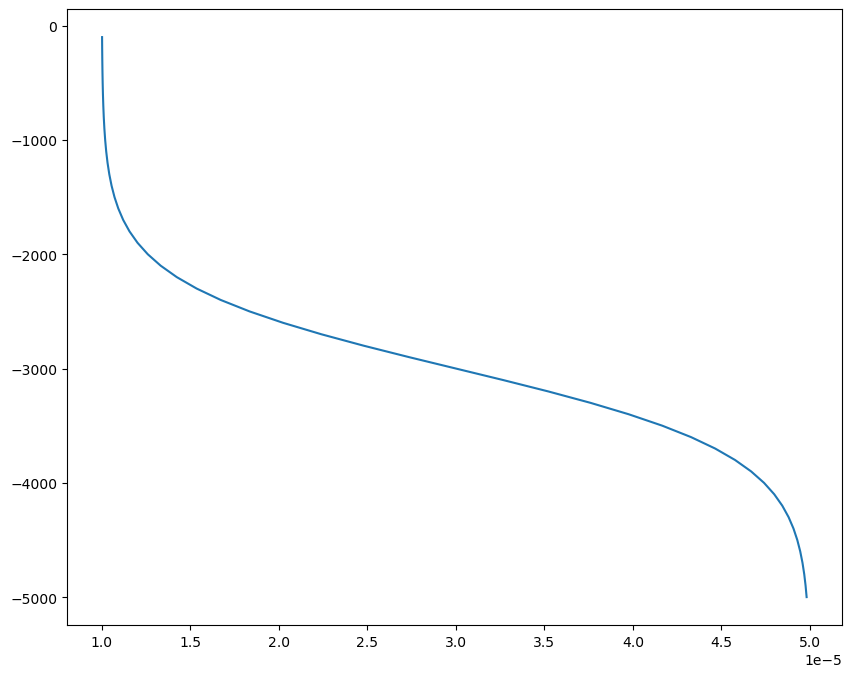

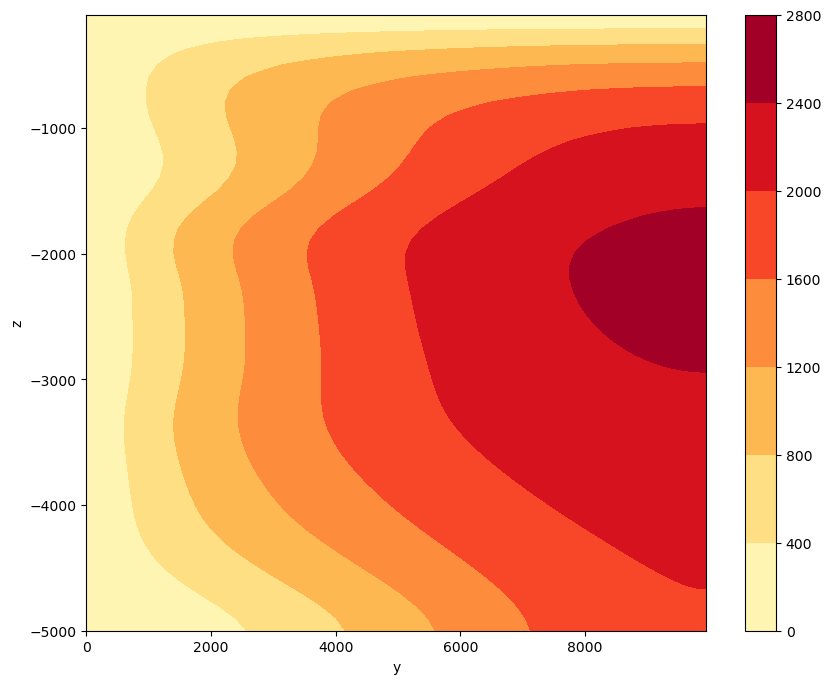

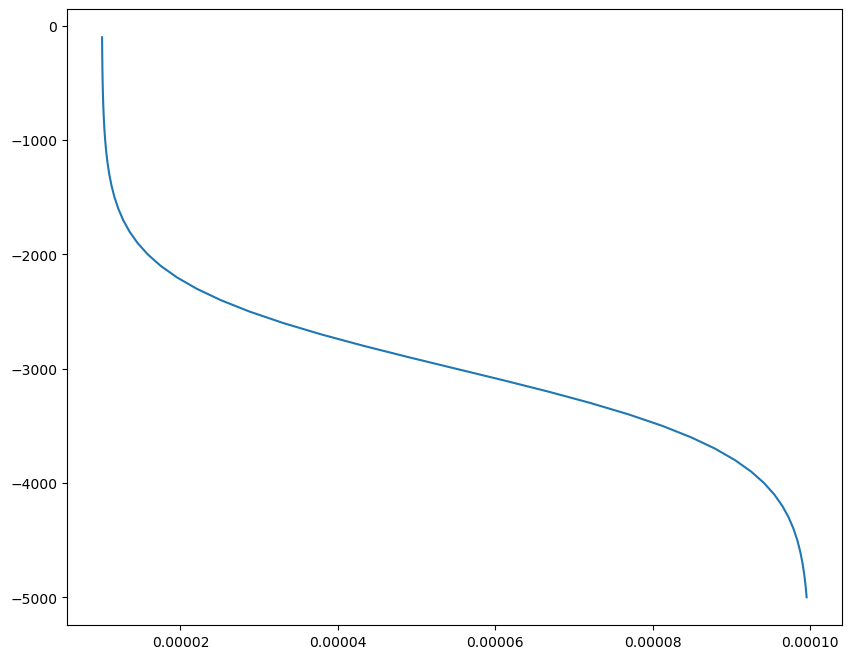

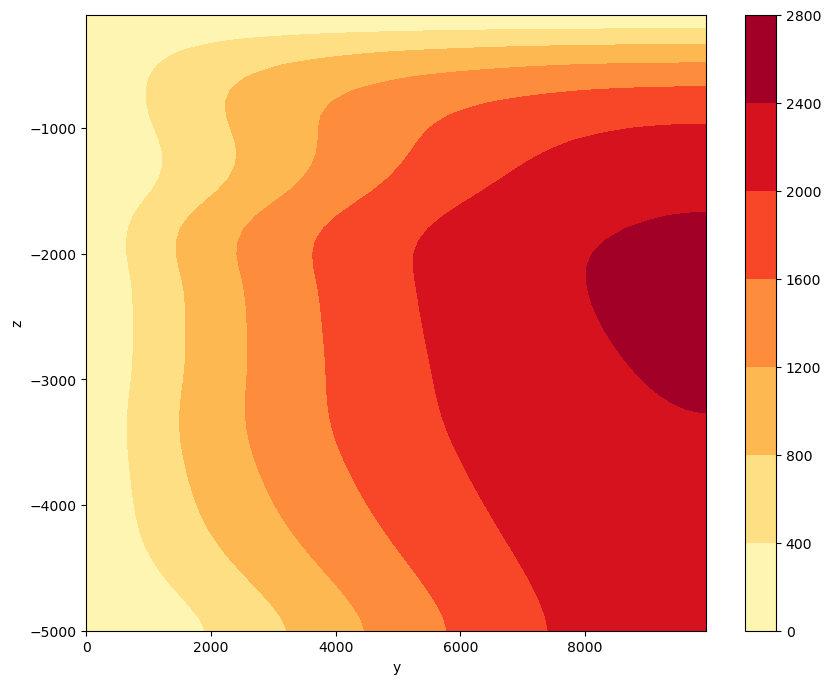

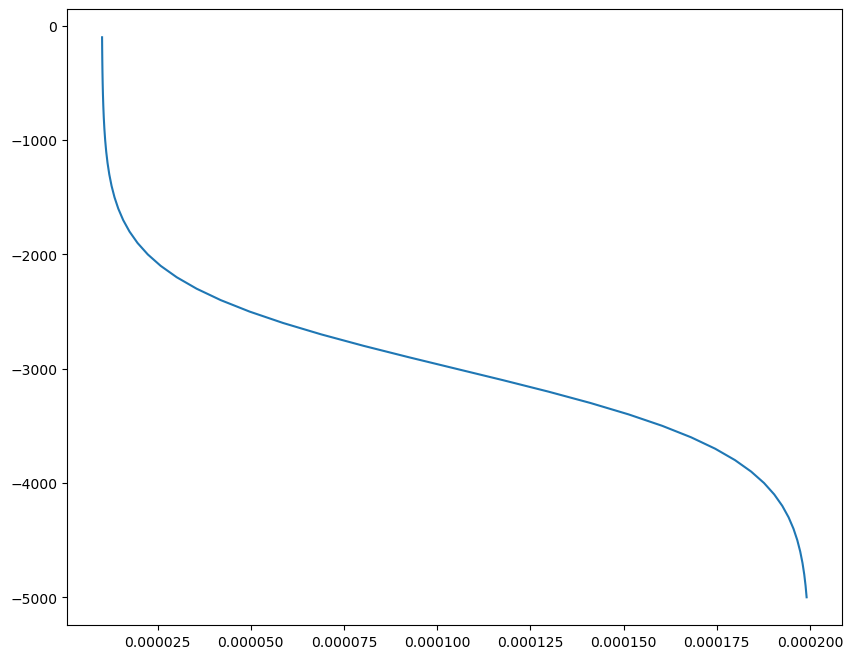

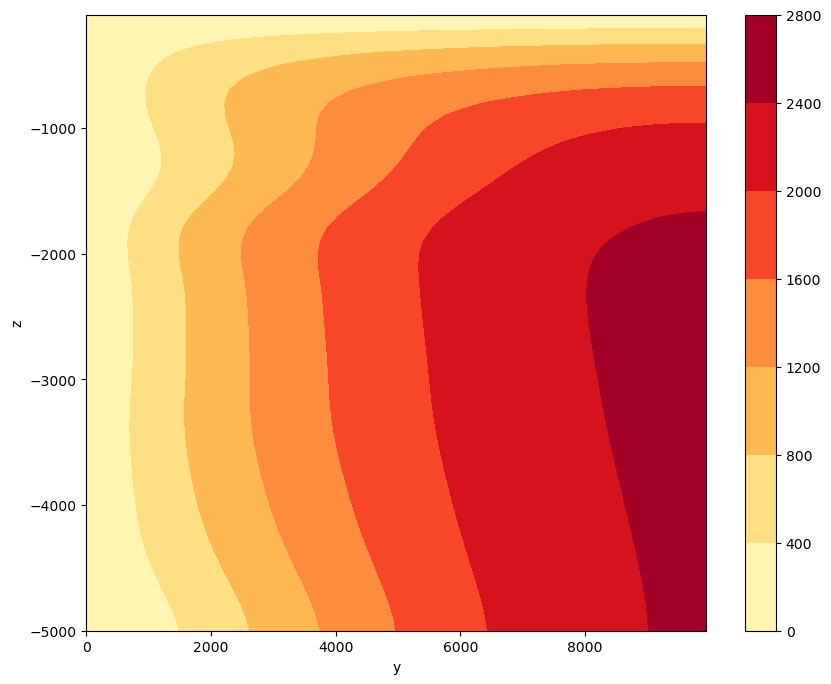

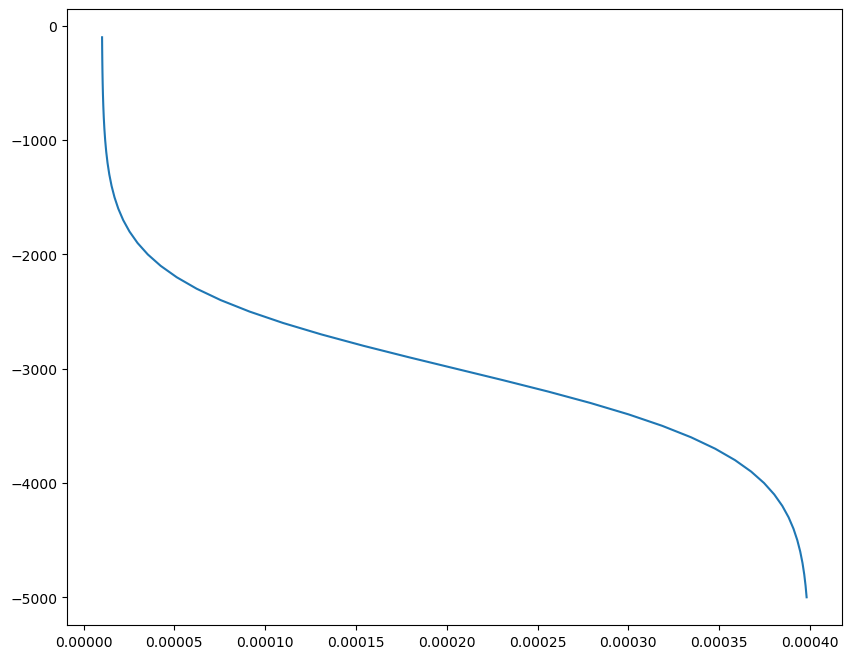

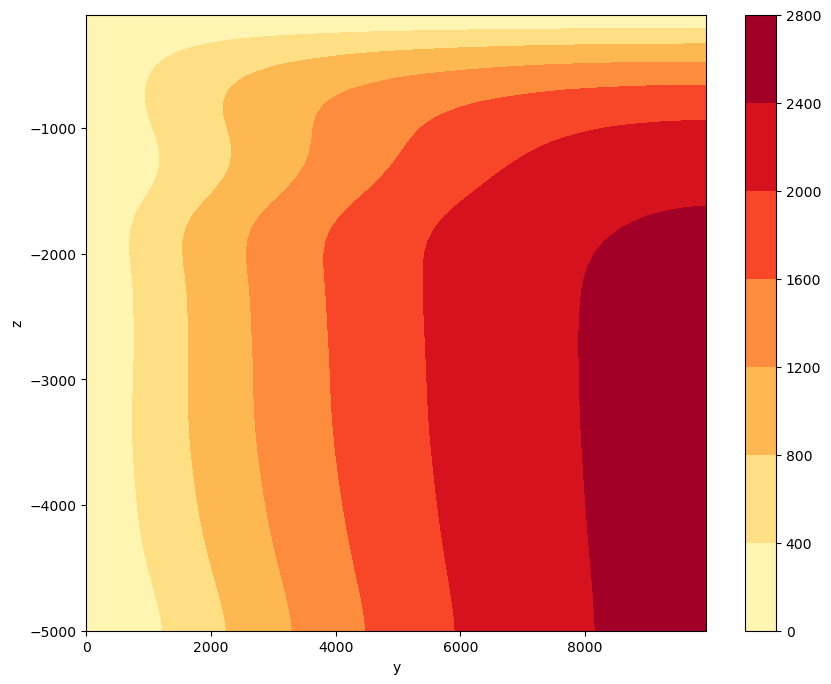

In [14]:
ksurf=1e-5
kdeep=0.5e-4
Zsill=-3000 #m
Hsill=750 #m
kv=1e-4
kdia1=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)

fig=plt.figure(figsize=myfigsize)
plt.plot(kdia1,Zl)    
fig=plt.figure(figsize=myfigsize)
age_1=calculate_tracer(kdia=kdia1,kiso=500)
plotage(age_1)

ksurf=1e-5
kdeep=1e-4
Zsill=-3000 #m
Hsill=750 #m
kv=1e-4
kdia2=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)

fig=plt.figure(figsize=myfigsize)
plt.plot(kdia2,Zl)    
fig=plt.figure(figsize=myfigsize)
age_2=calculate_tracer(kdia=kdia2,kiso=500)
plotage(age_2)

ksurf=1e-5
kdeep=2e-4
Zsill=-3000 #m
Hsill=750 #m
kv=1e-4
kdia3=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)

fig=plt.figure(figsize=myfigsize)
plt.plot(kdia3,Zl)    
fig=plt.figure(figsize=myfigsize)
age_3=calculate_tracer(kdia=kdia3,kiso=500)
plotage(age_3)


ksurf=1e-5
kdeep=4e-4
Zsill=-3000 #m
Hsill=750 #m
kv=1e-4
kdia4=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)

fig=plt.figure(figsize=myfigsize)
plt.plot(kdia4,Zl)    
fig=plt.figure(figsize=myfigsize)
age_4=calculate_tracer(kdia=kdia4,kiso=500)
plotage(age_4)

Text(0.5, 1.0, 'age4-age1')

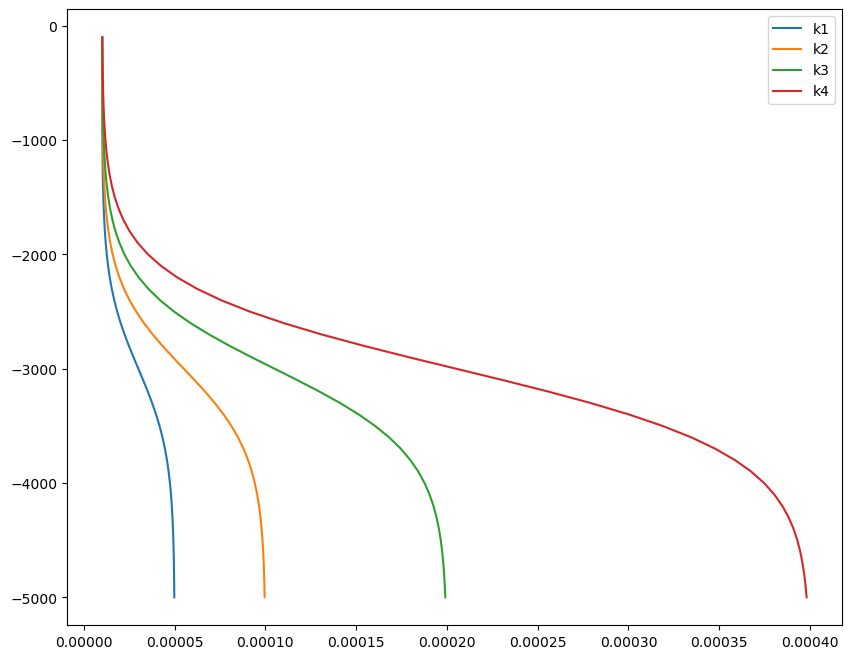

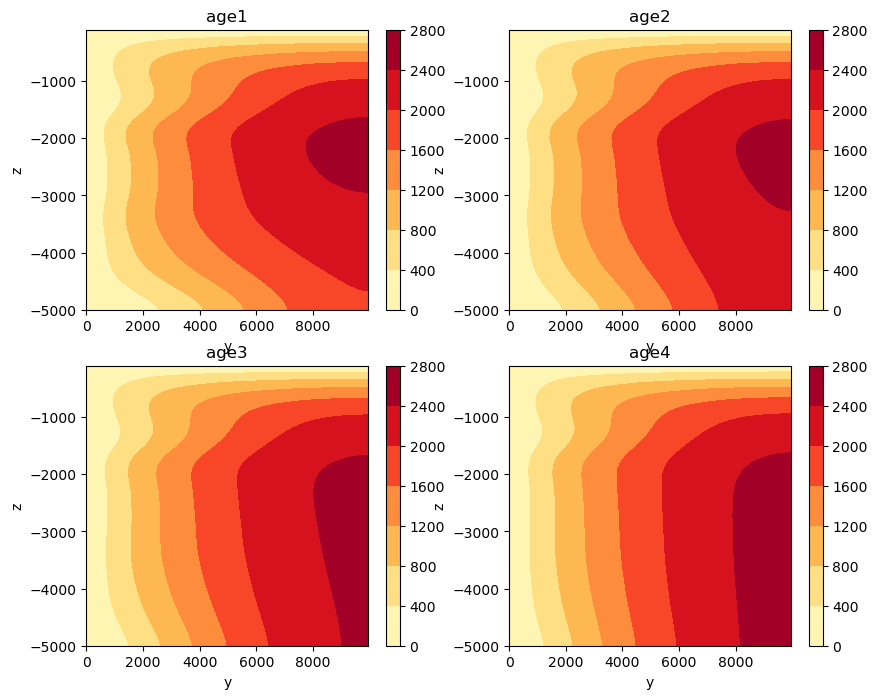

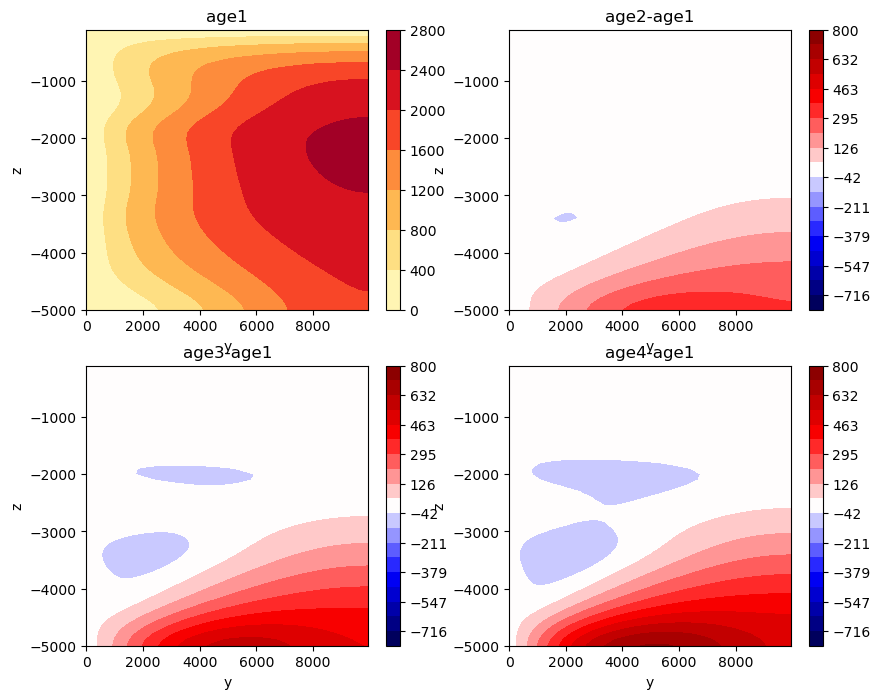

In [31]:
def plotagediff(age):
    plt.contourf(ybasin,Zl,age.T/31104000,cmap='seismic',levels=np.linspace(-800,800,20))
    plt.colorbar()
    plt.xlabel('y')
    plt.ylabel('z')
fig=plt.figure(figsize=myfigsize)


plt.plot(kdia1,Zl,label='k1')
plt.plot(kdia2,Zl,label='k2')
plt.plot(kdia3,Zl,label='k3')
plt.plot(kdia4,Zl,label='k4')
plt.legend()


fig=plt.figure(figsize=myfigsize)

plt.tight_layout()
plt.subplot(2,2,1)
plt.title('age1')
plotage(age_1)
plt.subplot(2,2,2)
plotage(age_2)
plt.title('age2')
plt.subplot(2,2,3)
plotage(age_3)
plt.title('age3')
plt.subplot(2,2,4)
plotage(age_4)
plt.title('age4')

fig=plt.figure(figsize=myfigsize)
plt.tight_layout()
plt.subplot(2,2,1)
plt.title('age1')
plotage(age_1)
plt.subplot(2,2,2)
plotagediff(age_2-age_1)
plt.title('age2-age1')
plt.subplot(2,2,3)
plotagediff(age_3-age_1)
plt.title('age3-age1')
plt.subplot(2,2,4)
plotagediff(age_4-age_1)
plt.title('age4-age1')


In [ ]:
plotage(age_3-age_1)

In [ ]:
age_kiso500=tracer

In [ ]:
fig=plt.figure(figsize=(7,2))
plt.contourf(ybasin,Zl,tracer.T/31104000,cmap=plt.cm.YlOrRd,levels=np.arange(0,2600,50))
plt.colorbar()
plt.xlabel('y')
plt.ylabel('z')
plt.title('age(year),5xkdiadeep')

In [ ]:
fig=plt.figure(figsize=(7,2))
plt.contourf(ybasin,Zl,tracer.T/31104000,cmap=plt.cm.YlOrRd,levels=np.arange(0,2600,50))
plt.colorbar()
plt.xlabel('y')
plt.ylabel('z')
plt.title('age(year)')

In [ ]:
fluxz.shape
fluxy.shape

In [ ]:
dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000
dV.shape
Vint.shape

In [ ]:
fig=plt.figure(figsize=(13,12))
plt.subplot(4,2,3)
plt.contourf(ybasin,Zl,(np.cumsum(advz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000).T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('vertical age advection on lower grid face\n integrated from north boundary')

plt.subplot(4,2,4)
plt.contourf(ybasin,Zl,(np.cumsum(diffz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000).T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('vertical age diffusion on lower grid face\n integrated from north boundary')

plt.subplot(4,2,2)
plt.contourf(ybasin,Zl,-np.cumsum(fluxy[:-1,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative zonal age flux on south grid face\n integrated from bottom')

plt.subplot(4,2,2)
plt.contourf(ybasin,Zl,-np.cumsum(advy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative advective meridional age flux on south\n grid face integrated from bottom')

plt.subplot(4,2,5)
plt.contourf(ybasin,Zl,-np.cumsum(diffy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1].T,cmap='seismic',levels=np.arange(-10e17,10.1e17,1e17))
plt.colorbar()
plt.title('nagative diffusive meridional age flux on south\n grid face integrated from bottom')

plt.subplot(4,2,1)
dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000*dz
Vint=np.cumsum((np.cumsum(dV[::-1,:],axis=0)[::-1,:])[:,::-1],axis=1)[:,::-1]
plt.contourf(ybasin,Zl,Vint.T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
plt.colorbar()
plt.title('Volume integrated from \n north(horizontal) and bottom(vertical)')

plt.subplot(4,2,6)
#dV=np.ones([Nbasin,Nz])*basin_width*1000*dy*1000*dz
#Vint=np.cumsum((np.cumsum(dV[::-1,:],axis=0)[::-1,:])[:,::-1],axis=1)[:,::-1]
cumfluxy=np.cumsum(fluxy[:-1,::-1]*basin_width*1000*dz,axis=1)[:,::-1]
cumfluxz=np.cumsum(fluxz[::-1,:],axis=0)[::-1,:]*basin_width*dy*1000*1000
cumfluxz=np.hstack((np.zeros([Nbasin,1]),cumfluxz[:,:-1]))
plt.contourf(ybasin,Zl,(cumfluxz-cumfluxy).T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
plt.colorbar()
plt.title('age flux divergence\n integrated from north(horizontal) and bottom(vertical)')
fig.subplots_adjust(wspace=0.2,hspace=0.4)

#plt.subplot(4,3,7)
#plt.contourf(ybasin,Zl,( Vint+np.cumsum(advy[:,::-1]*basin_width*1000*dz,axis=1)[:,::-1]).T,cmap='seismic',levels=np.arange(-14e17,14.1e17,1e17))
#plt.colorbar()

plt.suptitle('kiso=500')

In [ ]:
print(ybasin[80]+dy/2,Zl[19])
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(tracer[80,:]/31104000,Z/1000)
plt.xlabel('age(year)')
plt.ylabel('depth(km)')
plt.subplot(2,2,2)
plt.plot(v_basin_grid[80,:],Z/1000)
plt.xlabel('vvel(m/s)')
plt.axvline(x=0,color='black')
plt.subplot(2,2,3)
plt.scatter(tracer[80,19:]/31104000,v_basin_grid[80,19:],s=2,c=Z[19:]/1000)
plt.colorbar()
plt.xlabel('age(year)')
plt.ylabel('vvel(m/s)')
plt.axhline(y=0,color='black')
fig.subplots_adjust(wspace=0.2,hspace=0.2)


In [ ]:
a = np.arange(10)

np.where(a < 5, a*10,0)


In [ ]:
print(ybasin)

In [ ]:
basin_grid=np.zeros([Nbasin,Nz])
diapycnal_trans=kv*


In [ ]:
gamma_basin_init_xr=xr.DataArray(gamma_basin_init, coords=[Z], dims=["Z"])
ds = xr.Dataset(
        coords={
            "Z": (
                ["Z"],
                Z,
               {"axis": "Z"},
            ),
            "Zp1": (
                ["Zp1"],
                Zp1,
                {"axis": "Z", "c_grid_axis_shift": (-0.5, 0.5)},
            ),
        }
    )


In [ ]:
gamma_basin_init_xr
ds